In [1]:
import models
from models import get_raw_data, extrair_indicadores, indicadores_frequencia, get_rpm, filtro_passa_baixa
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
# pasta ='database/dados_brutos/normal'

# pasta ='database/dados_brutos/horizontal-misalignment/0.5mm'
# pasta ='database/dados_brutos/horizontal-misalignment/1.0mm'
# pasta ='database/dados_brutos/horizontal-misalignment/1.5mm'
# pasta ='database/dados_brutos/horizontal-misalignment/2.0mm'

# pasta ='database/dados_brutos/imbalance/6g'
# pasta ='database/dados_brutos/imbalance/10g'
# pasta ='database/dados_brutos/imbalance/15g'
# pasta ='database/dados_brutos/imbalance/20g'
# pasta ='database/dados_brutos/imbalance/25g'
# pasta ='database/dados_brutos/imbalance/30g'
# pasta ='database/dados_brutos/imbalance/35g'

# pasta ='database/dados_brutos/overhang/ball_fault/0g'
# pasta ='database/dados_brutos/overhang/ball_fault/6g'
# pasta ='database/dados_brutos/overhang/ball_fault/20g'
# pasta ='database/dados_brutos/overhang/ball_fault/35g'

# pasta ='database/dados_brutos/overhang/cage_fault/0g'
# pasta ='database/dados_brutos/overhang/cage_fault/6g'
# pasta ='database/dados_brutos/overhang/cage_fault/20g'
# pasta ='database/dados_brutos/overhang/cage_fault/35g'

# pasta ='database/dados_brutos/overhang/outer_race/0g'
# pasta ='database/dados_brutos/overhang/outer_race/6g'
# pasta ='database/dados_brutos/overhang/outer_race/20g'
# pasta ='database/dados_brutos/overhang/outer_race/35g'
 
# pasta ='database/dados_brutos/underhang/ball_fault/0g'
# pasta ='database/dados_brutos/underhang/ball_fault/6g'
# pasta ='database/dados_brutos/underhang/ball_fault/20g'
pasta ='database/dados_brutos/underhang/ball_fault/35g'

# pasta ='database/dados_brutos/underhang/cage_fault/0g'
# pasta ='database/dados_brutos/underhang/cage_fault/6g'
# pasta ='database/dados_brutos/underhang/cage_fault/20g'
# pasta ='database/dados_brutos/underhang/cage_fault/35g'

# pasta ='database/dados_brutos/underhang/outer_race/0g'
# pasta ='database/dados_brutos/underhang/outer_race/6g'
# pasta ='database/dados_brutos/underhang/outer_race/20g'
# pasta ='database/dados_brutos/underhang/outer_race/35g'

In [3]:
arquivos = os.listdir(pasta) # for n2
arquivo = arquivos[-10] # for n3
calibracao = ['interno','externo']
sensor = f'rolamento_{calibracao[0]}_radial2'
coluna = models.sensores[sensor]

frequencia_de_referencia = models.frequencias_rolamento
dataframe = []
ordens_frequencia = 5
largura_banda = 2

In [4]:
sinal = get_raw_data.GetData(pasta,arquivo,coluna).Get()
# sinal = sinal[0:models.freq_aquisicao]
# sinal_rpm = get_raw_data.GetData(pasta,arquivo,0).Get()[0:models.freq_aquisicao]

rpm = get_rpm.GetRPM(pasta,arquivo).get_rpm_medio()
frequencias_rolamento = models.frequencias_rolamento

for rolamento in frequencias_rolamento:
    if sensor.__contains__(rolamento):
        frequencia_de_referencia = frequencias_rolamento[rolamento]
        print(rolamento)
        break
        
print(frequencia_de_referencia)

for i in range(len(frequencia_de_referencia)):
    frequencia_de_referencia[i] = frequencia_de_referencia[i]*rpm
    
# frequencia_de_referencia = [models.outer_race]

interno
[1.9578, 3.0]


In [5]:
Objeto_Frequencia = indicadores_frequencia.DominioFrequencia(sinal,rpm)
fourier_banda, frequencia_banda = Objeto_Frequencia.banda_frequencia(rpm,2)
# print(len(Objeto_Frequencia.fft_frequencia))
# np.abs(frequencia_banda)

# rpm = np.abs(frequencia_banda[list(fourier_banda).index(np.max(fourier_banda),0,-1)])
# rpm



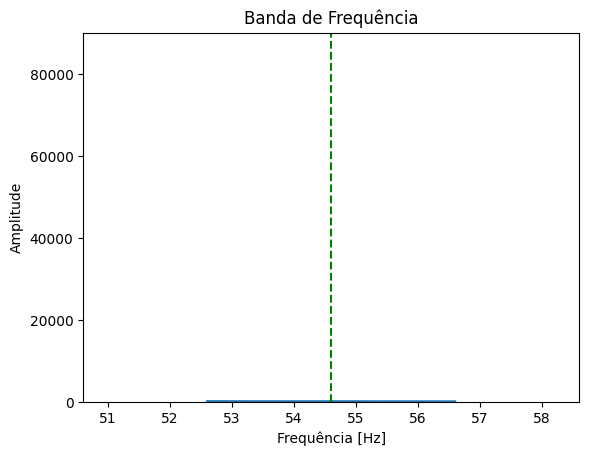

(257.23535451882424+0j)


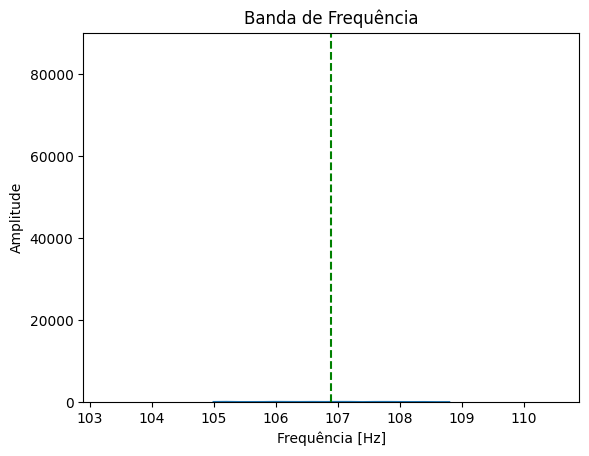

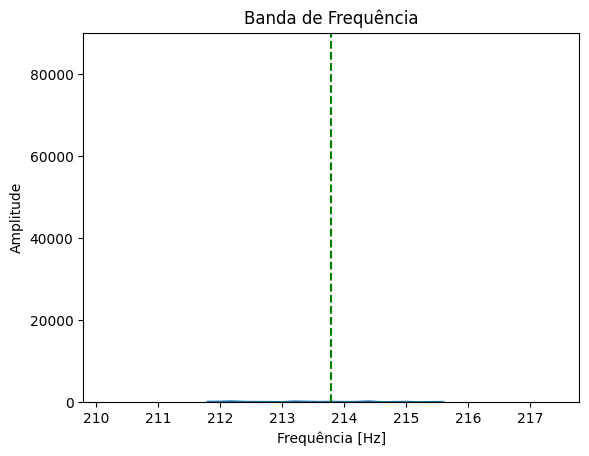

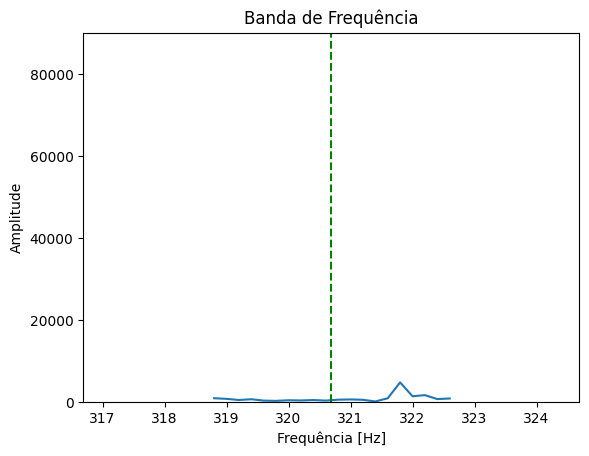

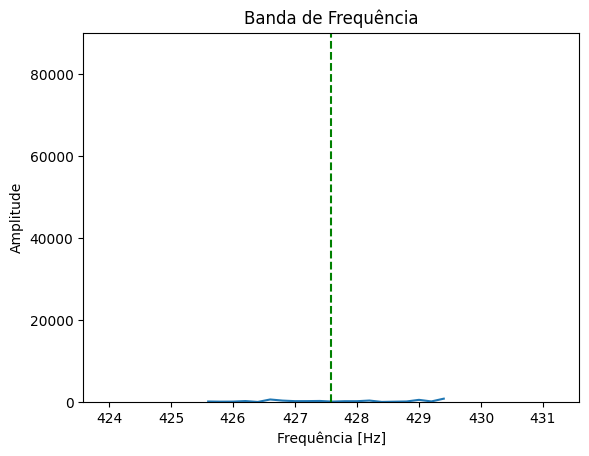

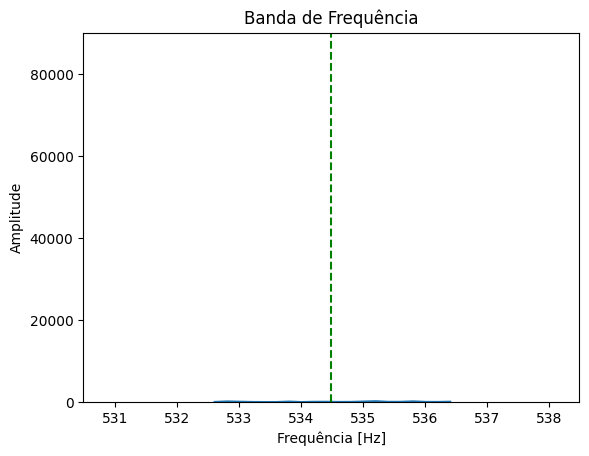

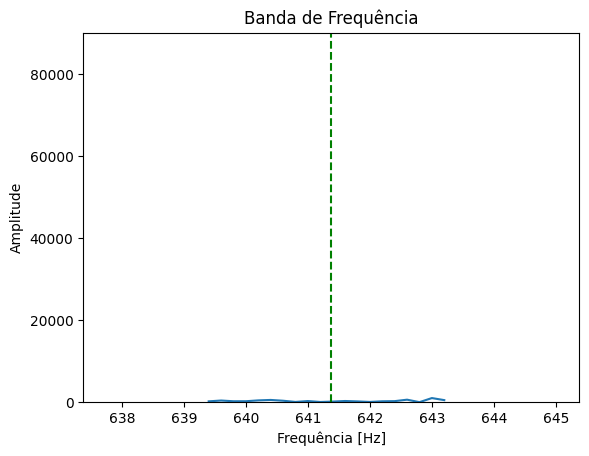

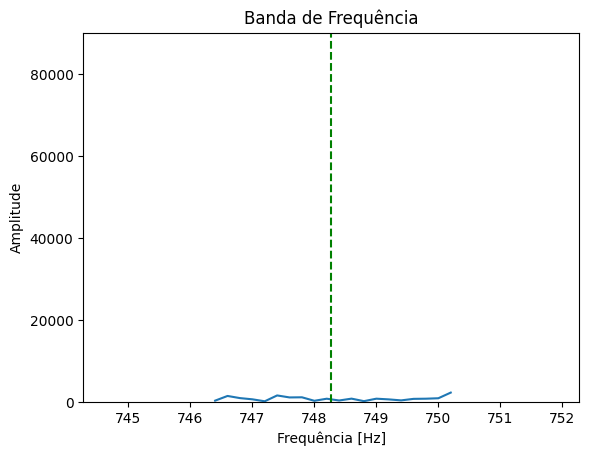

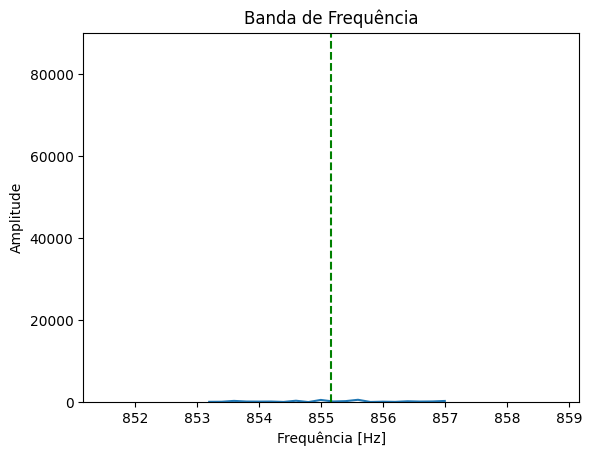

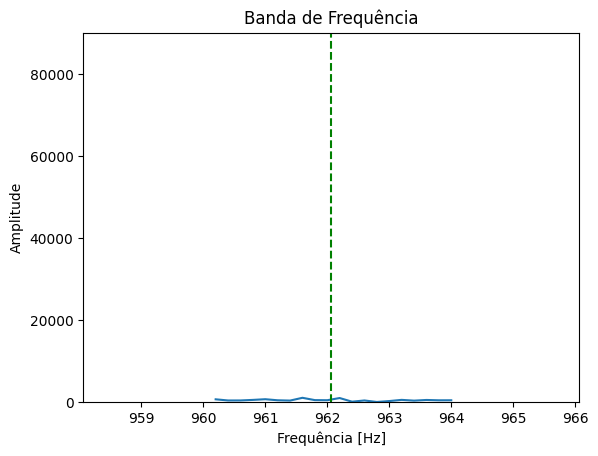

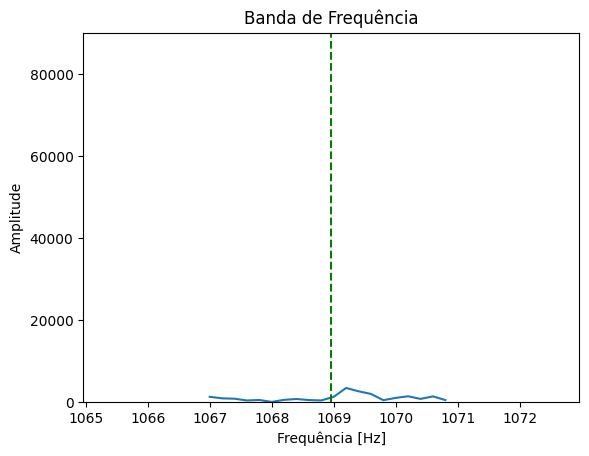

In [11]:
Objeto_Frequencia.plot_banda(rpm,rpm)
print(np.max(Objeto_Frequencia.fourier_banda))

# indice_rpm_correto = list(Objeto_Frequencia.fourier_banda).index(np.max(Objeto_Frequencia.fourier_banda),0,-1)

# rpm_medio = np.abs(Objeto_Frequencia.frequencia_banda[indice_rpm_correto])

for ordem in range(10):
    Objeto_Frequencia.plot_banda(frequencia_de_referencia[0]*(ordem+1),rpm)

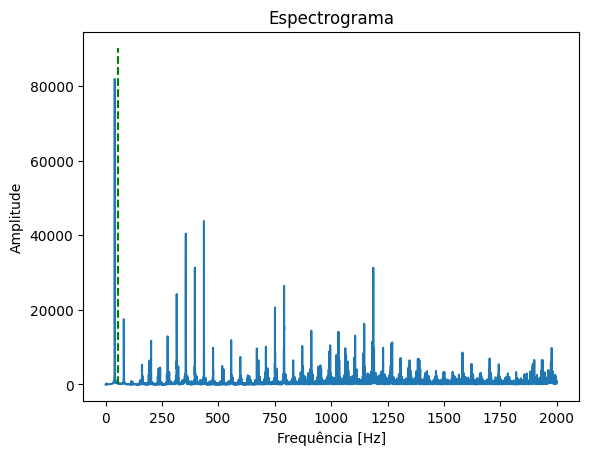

In [7]:
Objeto_Frequencia.plot_fft()

In [8]:
sinal_filtrado = filtro_passa_baixa.Filtro(sinal,10000,5).FiltroPassaBaixa()


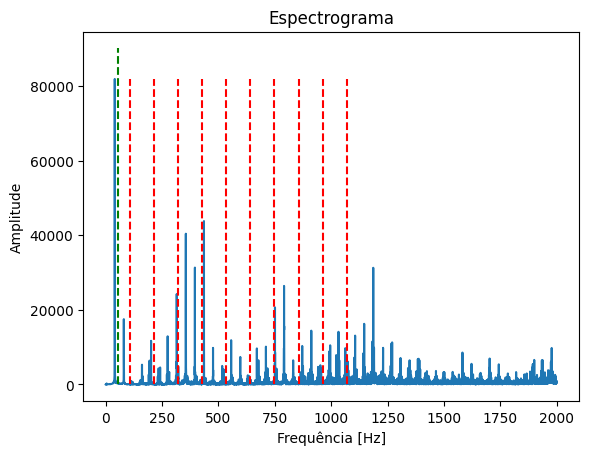

In [9]:
Objeto_Frequencia = indicadores_frequencia.DominioFrequencia(sinal_filtrado,rpm)
Objeto_Frequencia.plot_fft(frequencia_de_referencia)